In [1]:
%matplotlib inline 
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()


In [2]:
# 通过ToTensor实例将图像数据从PIL类型变换成32位浮点数格式
# 除以255 使得数值 0-1
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root='../data',train=True,transform=trans,download=True) #下载训练集
mnist_test =torchvision.datasets.FashionMNIST(root='../data',train=False,transform=trans,download=True) #下载测试集

len(mnist_train), len(mnist_test)

(60000, 10000)

In [3]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

In [4]:
def get_fashion_mnist_labels(labels):
    """返回Fashion-NMIST数据集的文本标签。"""
    text_labels=['t-shirt','trouser','pullover','dress','coat','sandal','sneaker','bag','ankle boot','sandal']
    return [text_labels[int(i)] for i in labels]

def show_images(imgs,num_rows,num_cols,titles=None,scale=1.5):#要接受的图片列表，图片显示的行数，列数，
    """plot a list of img"""
    figsize=(num_cols*scale,num_rows*scale)#计算图形的大小
    _,axes = d2l.plt.subplots(num_rows,num_cols,figsize=figsize) #建立一个子图网络，_用于忽略返回的图形对象，只保留子图数组axes
    axes=axes.flatten()#将二维子图数组转化为一维
    for i , (ax,img) in enumerate(zip(axes,imgs)):#使用 enumerate 和 zip 函数遍历每个子图 ax 和每张图片 img。
        if torch.is_tensor(img):
            #图片张量
            ax.imshow(img.numpy())#如果 img 是一个张量，先将其转换为 NumPy 数组，然后使用 imshow 函数在子图 ax 上显示。
        else :
            ax.imshow(img)#在子图 ax 上显示图片 img。
        if titles is not None and len(titles) > i:  
            ax.set_title(titles[i])  
          
        # 隐藏x轴和y轴的标签  
        ax.axis('off')  


'5.84 sec'

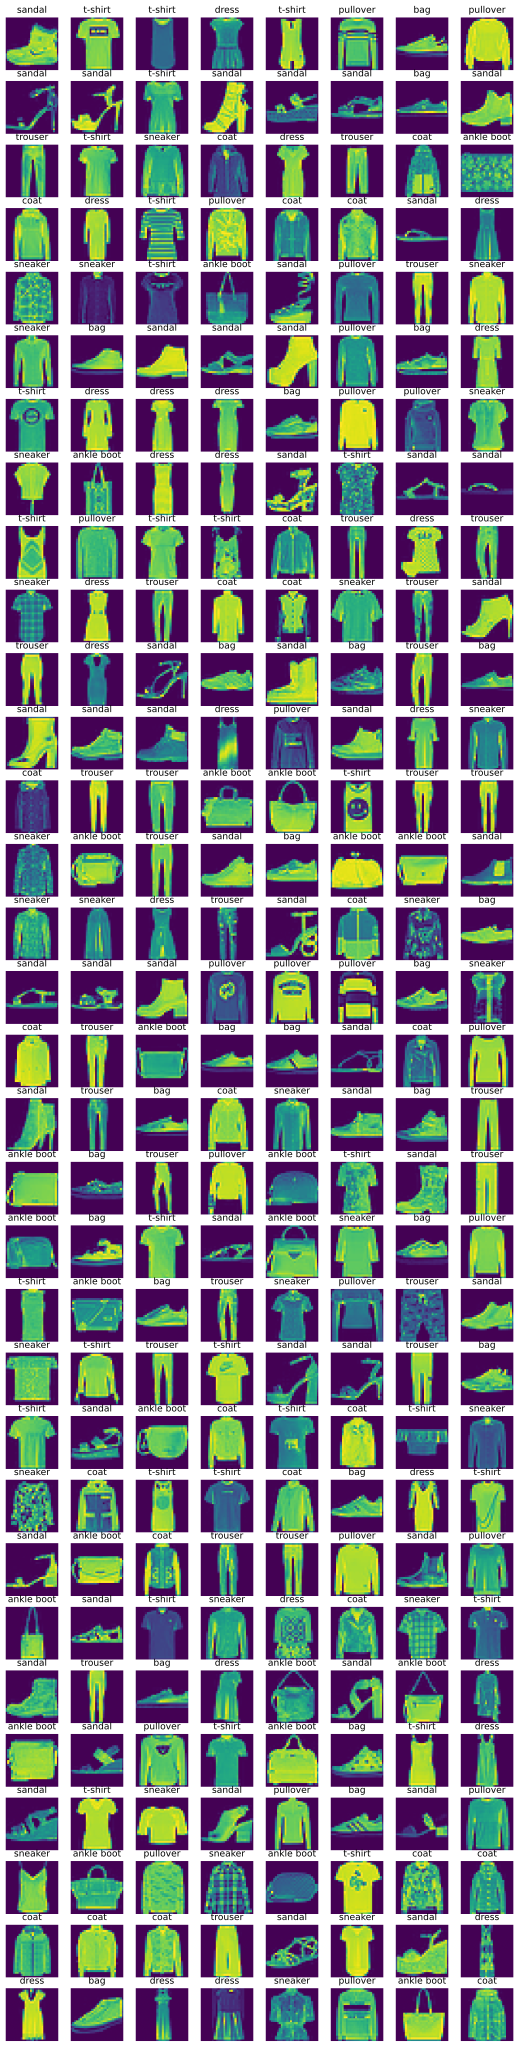

In [7]:
X,y=next(iter(data.DataLoader(mnist_train,batch_size=256)))
timer =d2l.Timer()
show_images(X.reshape(256,28,28),32,8,titles=get_fashion_mnist_labels(y))
f'{timer.stop():.2f} sec'

In [6]:
batch_size=256

def get_dataloader_workers():
    return 4
    
train_iter=data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=get_dataloader_workers())

timer =d2l.Timer()

for X,y in train_iter:
    continue
f'{timer.stop():.2f} sec'

'10.42 sec'